In [35]:
import pandas as pd
import numpy as np
import operator
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter

import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
IPythonConsole.ipython_useSVG=True

np.random.seed(314)

In [37]:
df = pd.read_csv("data/processed/smiles.csv", sep=';', encoding='unicode_escape')
df

,molregno,standard_value_get_mean,standard_units_get_levels,standard_type_get_levels,chembl_id_compound_get_levels,canonical_smiles_get_levels,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12
0,2208,199.53,nM,IC50,CHEMBL38,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)C(C)(C)CCC1,199.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40459,31900.0,nM,IC50,CHEMBL28721,O=C(O)C(S)C(S)C(=O)O,31900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92776,1770.0946666666666,nM,IC50,CHEMBL62136,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,60.0,204.0,316.23,330.0,501.19,540.0,1700.0,1730.0,2010.0,3000.0,3500.0,4400.0,6500.0
3,155592,10000.0,nM,IC50,CHEMBL418971,CC(C)(c1ccc(O)cc1)c1ccc(O)cc1,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201200,2820.0,nM,IC50,CHEMBL169,C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)CC[C@H](O)C...,130.0,680.0,1060.0,9410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2459160,75.0,nM,IC50,CHEMBL4588729,O=C(O)c1ccc(-n2cc(C(=O)c3c(Cl)cccc3Cl)c3ccccc3...,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2211,2459686,2578.0,nM,IC50,CHEMBL4589255,Cc1c(C(=O)c2c(Cl)cccc2Cl)c2ccccc2n1-c1ccc(C(=O...,156.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,2462878,27.0,nM,IC50,CHEMBL4592447,Cc1cccc(Cl)c1C(=O)c1cn(-c2ccc(C(=O)O)cc2F)c2nc...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2213,2463217,357.7,nM,IC50,CHEMBL4592786,N#Cc1cccc(NC(=O)Nc2ccc3c(c2)C(N2CC4CCC(C2)N4C(...,357.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.columns


Index(['molregno', 'standard_value_get_mean', 'standard_units_get_levels',
       'standard_type_get_levels', 'chembl_id_compound_get_levels',
       'canonical_smiles_get_levels', 'act_0', 'act_1', 'act_2', 'act_3',
       'act_4', 'act_5', 'act_6', 'act_7', 'act_8', 'act_9', 'act_10',
       'act_11', 'act_12'],
      dtype='object')

In [39]:
df_probe = df.head(10)
df_probe

,molregno,standard_value_get_mean,standard_units_get_levels,standard_type_get_levels,chembl_id_compound_get_levels,canonical_smiles_get_levels,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12
0,2208,199.53,nM,IC50,CHEMBL38,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)C(C)(C)CCC1,199.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40459,31900.0,nM,IC50,CHEMBL28721,O=C(O)C(S)C(S)C(=O)O,31900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92776,1770.0946666666666,nM,IC50,CHEMBL62136,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,60.0,204.0,316.23,330.0,501.19,540.0,1700.0,1730.0,2010.0,3000.0,3500.0,4400.0,6500.0
3,155592,10000.0,nM,IC50,CHEMBL418971,CC(C)(c1ccc(O)cc1)c1ccc(O)cc1,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201200,2820.0,nM,IC50,CHEMBL169,C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)CC[C@H](O)C...,130.0,680.0,1060.0,9410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,242555,80000.0,nM,IC50,CHEMBL358290,NS(=O)(=O)c1ccc(N/C(S)=N\CCc2ccccc2)cc1,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,342149,10000.0,nM,IC50,CHEMBL382792,O=S(=O)(Nc1ccc(C(O)(C(F)(F)F)C(F)(F)F)cc1)c1cc...,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,342577,883.0,nM,IC50,CHEMBL205937,O=S(=O)(c1ccccc1)N1CCc2cc(C(O)(C(F)(F)F)C(F)(F...,883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,370136,80000.0,nM,IC50,CHEMBL220259,Nc1ccc2c(O)cc(S(=O)(=O)O)cc2c1,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,370163,10000.0,nM,IC50,CHEMBL384441,O=S(=O)(c1ccc(O)cc1)c1ccc(O)cc1,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
mols = [Chem.MolFromSmiles(smi) for smi in df_probe['canonical_smiles_get_levels']]


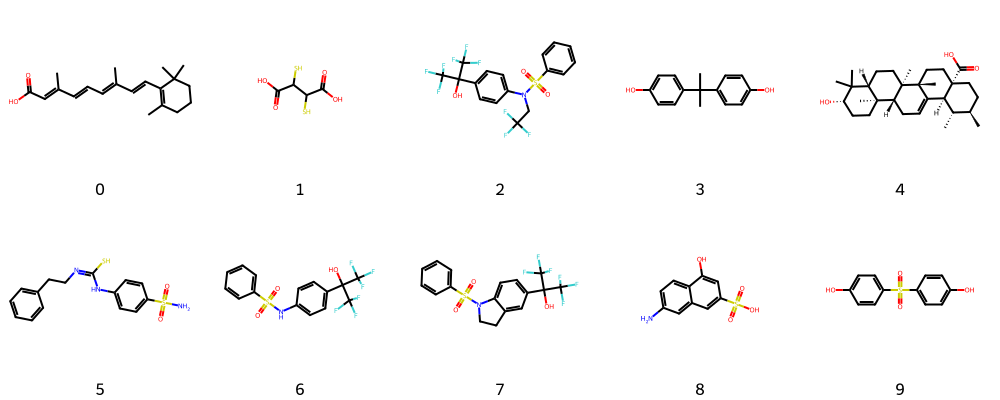

In [41]:
Draw.MolsToGridImage(mols, molsPerRow=5, legends=[str(i) for i in range(len(mols))])


In [43]:
df_aggregated = pd.read_csv("data/processed/smiles_aggregated.csv", sep=',', encoding='unicode_escape')
df_aggregated

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1515,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1516,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1517,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [44]:
df_aggregated_probe = df_aggregated[:10]
df_aggregated_probe

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.000000,26.100143,5
5,S1(=O)C[C@@H](Cc2cc(OC(C(F)(F)F)C(F)(F)F)c(N)c...,BACE_6,1,Train,8.698970,585.59772,3.8615,2,3,10,...,56.657166,35.376312,179.54280,132.09418,33.514153,0.000000,8.188327,0.980913,28.106575,6
6,S(=O)(=O)(CCCCC)C[C@@H](NC(=O)c1cccnc1)C(=O)N[...,BACE_7,1,Train,8.698970,645.78009,3.1973,5,4,18,...,63.830162,52.390511,263.78134,190.54213,45.370659,0.000000,23.859961,0.000000,24.663788,7
7,Fc1c2c(ccc1)[C@@]([NH+]=C2N)(C=1C=C(C)C(=O)N(C...,BACE_8,1,Train,8.612610,477.55200,3.7096,2,0,4,...,42.899986,65.744499,171.12137,146.12990,28.109447,0.000000,-6.106466,13.955495,12.331894,8
8,O1c2c(cc(cc2)CC)[C@@H]([NH2+]C[C@@H](O)[C@H]2N...,BACE_9,1,Train,8.602060,556.71503,4.7010,4,3,5,...,53.205711,68.418541,299.00003,140.68362,28.755558,0.000000,15.879790,6.904104,24.663788,9
9,O=C1N(CCCC1)C(C)(C)[C@@H]1C[C@@H](CCC1)C(=O)N[...,BACE_10,1,Train,8.602060,562.80573,4.3981,3,3,12,...,93.700790,57.796051,379.48660,151.64662,23.654478,0.000000,24.148668,0.000000,24.663788,10


In [45]:
df_aggregated.columns

Index(['mol', 'CID', 'Class', 'Model', 'pIC50', 'MW', 'AlogP', 'HBA', 'HBD',
       'RB',
       ...
       'PEOE6 (PEOE6)', 'PEOE7 (PEOE7)', 'PEOE8 (PEOE8)', 'PEOE9 (PEOE9)',
       'PEOE10 (PEOE10)', 'PEOE11 (PEOE11)', 'PEOE12 (PEOE12)',
       'PEOE13 (PEOE13)', 'PEOE14 (PEOE14)', 'canvasUID'],
      dtype='object', length=595)

In [46]:
df_aggregated_probe_mols = df_aggregated_probe['mol']

In [48]:
df_aggregated_probe_mols

0    O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...
1    Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...
2    S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
3    S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...
4    S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
5    S1(=O)C[C@@H](Cc2cc(OC(C(F)(F)F)C(F)(F)F)c(N)c...
6    S(=O)(=O)(CCCCC)C[C@@H](NC(=O)c1cccnc1)C(=O)N[...
7    Fc1c2c(ccc1)[C@@]([NH+]=C2N)(C=1C=C(C)C(=O)N(C...
8    O1c2c(cc(cc2)CC)[C@@H]([NH2+]C[C@@H](O)[C@H]2N...
9    O=C1N(CCCC1)C(C)(C)[C@@H]1C[C@@H](CCC1)C(=O)N[...
Name: mol, dtype: object